## Genetic algorithms for team formation. Usage example.
This notebook shows how to use the implemented genetic algorithm for team formation.

In [1]:
import sys
sys.path.insert(0,"..")
from GA import *
from general_functions import *
import pandas as pd
df = pd.read_csv("../data/student_data_anon.csv",delimiter=";")

df = df.sample(n=60)

### 0. Data preparation

In [2]:
# This time with MBTI
df = df.loc[:,["student_id","E/I","S/N","T/F","J/P"]]

# Do something with the null values (your criterion)
df.fillna(0, inplace=True)

df.head()

,student_id,E/I,S/N,T/F,J/P
308,309,10.0,-10.0,-6.0,0.0
274,275,6.0,-2.0,-6.0,4.0
291,292,-2.0,4.0,-6.0,10.0
267,268,6.0,-12.0,-12.0,-2.0
111,112,6.0,6.0,4.0,12.0


In [3]:
# List of students
students = list(df["student_id"])

# Table of scores into a dictionary
scores_dict = scores_table2dict(df) #from the general_functions module
print(scores_dict)

{'E/I': [10.0, 6.0, -2.0, 6.0, 6.0, 2.0, 0.0, 0.0, 2.0, 0.0, 8.0, 6.0, 0.0, -2.0, 0.0, 2.0, 2.0, 0.0, 0.0, 0.0, 0.0, -6.0, 0.0, 6.0, 2.0, 4.0, 6.0, 0.0, 8.0, 2.0, 0.0, 0.0, 0.0, 6.0, -2.0, 8.0, 0.0, -2.0, 0.0, 4.0, 0.0, 0.0, 0.0, 0.0, 2.0, 0.0, 6.0, 0.0, 2.0, 4.0, 6.0, 0.0, 0.0, 2.0, 6.0, 0.0, 0.0, 8.0, 0.0, 4.0], 'S/N': [-10.0, -2.0, 4.0, -12.0, 6.0, 0.0, 0.0, 0.0, -4.0, 10.0, 2.0, -14.0, 0.0, 10.0, 0.0, -4.0, 4.0, 0.0, 2.0, 0.0, 0.0, -1.0, 0.0, -6.0, 6.0, -8.0, -3.0, 0.0, -6.0, -12.0, -10.0, 0.0, 0.0, 4.0, 12.0, -8.0, 0.0, 4.0, 0.0, -6.0, 0.0, -4.0, 0.0, 0.0, -19.0, 0.0, -10.0, 0.0, 0.0, -6.0, -5.0, 0.0, 0.0, -2.0, 8.0, 0.0, 0.0, 4.0, 0.0, -1.0], 'T/F': [-6.0, -6.0, -6.0, -12.0, 4.0, 4.0, 0.0, 0.0, -6.0, -2.0, -4.0, 4.0, -2.0, -10.0, 0.0, -8.0, 8.0, 0.0, 4.0, 0.0, 0.0, -2.0, 0.0, 2.0, -8.0, -4.0, -10.0, 0.0, 12.0, 10.0, -8.0, 0.0, 0.0, -2.0, 2.0, 8.0, 0.0, 6.0, 0.0, -6.0, 0.0, -6.0, 0.0, 0.0, -2.0, 0.0, -4.0, 6.0, -2.0, -6.0, 2.0, 0.0, 0.0, 8.0, -8.0, 0.0, 0.0, 10.0, 0.0, 2.0], 'J/P'

In [4]:
# Defining the constraints

MIN_G, MAX_G = 3, 6
no_mates = [] # [{1,3},{7,21}]
compulsory = [set(df.sample(2)["student_id"]) for i in range(3)] # [{1,2},{10,30}]
restr_num_groups = {} # {3:[1,5]}

### 1. Defining the StudentGA object and examples of method outputs.

In [5]:
student_ga = StudentGA(students=students, 
                       scores_d=scores_dict,
                       compulsory=compulsory,
                       reject=no_mates,
                       mingroup=MIN_G,
                       maxgroup=MAX_G,
                       dict_rest=restr_num_groups,
                       scoring_type=2)

In [6]:
# Some of the valid masks of the problem
for v in student_ga.valid_masks[0:3]:
    print(v) 

[0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0]
[0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0]
[0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0]


In [7]:
random_solution = student_ga.generate_random_solution()

print(f"Random encoded solution: \n{random_solution}\n")
print(f"Random solution: \n{student_ga.decode_solution(random_solution)}\n")
print(f"Solution fitness: {student_ga.get_fitness(random_solution)}")

Random encoded solution: 
[[90, 24, 154, 308, 186, 43, 72, 102, 15, 320, 280, 268, 109, 355, 223, 112, 374, 49, 73, 282, 194, 242, 36, 343, 96, 364, 6, 204, 373, 287, 230, 245, 171, 188, 368, 294, 336, 54, 292, 50, 163, 184, 254, 199, 22, 115, 309, 275, 103, 318, 319, 142, 61, 87, 326, 162, 159, 40, 322, 11], [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0]]

Random solution: 
[{24, 90, 308, 154}, {72, 186, 43, 102}, {320, 280, 268, 15}, {112, 355, 109, 223}, {73, 49, 282, 374}, {96, 194, 36, 242, 343}, {6, 204, 364, 373, 287}, {230, 171, 368, 245, 188}, {292, 294, 336, 50, 54}, {163, 199, 22, 184, 254}, {103, 275, 115, 309, 318}, {326, 142, 87, 61, 319}, {162, 322, 40, 11, 159}]

Solution fitness: 0


In [8]:
# As there are multiple compulsory pair of students, the most usual is to get non feasible solutions at first.
# This does not happen when other constraints besides the team sizes are included. Check this by replacing
# the compulsory list with an empty one.
random_population = student_ga.generate_random_population(population_size=2)
for i, sol in enumerate(random_population):
    print(f"Solution {i+1} has fitness {student_ga.get_fitness(sol)}")

Solution 1 has fitness 0
Solution 2 has fitness 0


In [9]:
mutated_1 = student_ga.randomised_mask_mutation(random_solution[1])
print(random_solution[1])
print(mutated_1)

[0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0]
[0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0]


### 2. GA execution.

In [10]:
# If no configuration passed, it uses the global best from experiments
result_data, iteration_data = student_ga.execute() 
result_data

,best_fitness,iterations,final_time,final_population
0,5.25,162,70.704286,"[[[242, 199, 254, 115, 292, 355, 90, 112, 374,..."


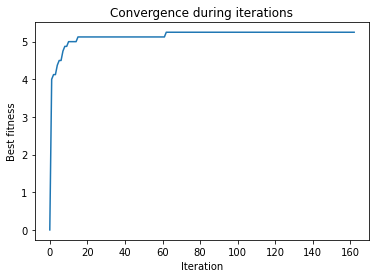

In [11]:
import matplotlib.pyplot as plt
iteration_data.plot(x="iterations",y="best_fitness",legend=False,ylabel="Best fitness",
                    xlabel="Iteration",title="Convergence during iterations")
plt.show()

Best fitness: 0    4.75
Name: best_fitness, dtype: float64.
Final time: 0    1387.960025
Name: final_time, dtype: float64 seconds.


<AxesSubplot:title={'center':'Convergence during iterations'}, xlabel='Iteration', ylabel='Best fitness'>

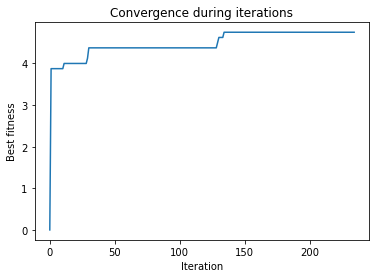

In [12]:
# With a specific configuration
# Configuration follows this pattern:
# (perm_cross, p_cross, key_cross, perm_mut, p_mut, key_mut, selection, replacement, population_size)
result_data, iteration_data = student_ga.execute(configuration=('CX', 0.6, 'InheritMask', 'RSM', 0.5, 'RandomisedMasking', 'RWS-sp-1.5', 'EL', 100))
print(f"Best fitness: {result_data['best_fitness']}.")
print(f"Final time: {result_data['final_time']} seconds.")
iteration_data.plot(x="iterations",y="best_fitness",legend=False,ylabel="Best fitness",
                    xlabel="Iteration",title="Convergence during iterations")